In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Part 1: Prepare the Data

In [3]:
#Read myopia.csv into a Pandas DataFrame.
#Remove the "MYOPIC" column from the dataset.
#Standardise your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
file = Path ('Instructions/Resources/myopia.csv')
df = pd.read_csv(file)

classes = df['MYOPIC']
df1=df.drop(['MYOPIC'], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_data = scaler.fit_transform(df1)

new_df1 = pd.DataFrame(scaler_data, columns=df1.columns)
new_df1.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [4]:
# checking the number of the features:
new_df1.shape

(618, 14)

Part 2: Apply Dimensionality Reduction

In [5]:
# Perform dimensionality reduction with PCA. How did the number of the features change?
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
# Create a scatter plot of the t-SNE output. Are there distinct clusters?

from sklearn.decomposition import PCA

pca = PCA (n_components=0.90)
new_df1_pca = pca.fit_transform(new_df1)

new_df1_pca.shape

(618, 10)

The number of features has changed from 14 to 10 after performing dimensionality reduction with PCA

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42, learning_rate= 400)
tsne_features = tsne.fit_transform(new_df1_pca)
tsne_features.shape

c:\Users\panzh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 3)

The number of features has changed from 10 to 13 after performing reduce the dataset dimensions with t-SNE

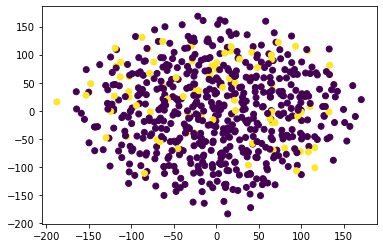

In [7]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c =classes)
plt.show()

There is no distinct cluster for TSNE model

Part 3: Perform a Cluster Analysis with K-means

c:\Users\panzh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


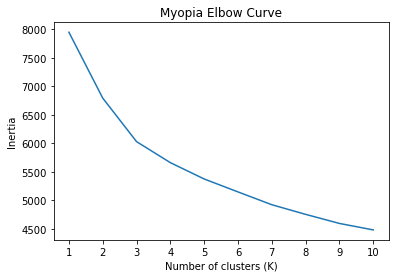

In [8]:
# Create an elbow plot to identify the best number of clusters.

from sklearn.cluster import KMeans
inertia =[]
k = list (range(1,11))

for i in k:
    km = KMeans (n_clusters=i, random_state= 0)
    km.fit (new_df1_pca)
    inertia.append (km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot (df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Myopia Elbow Curve')
plt.show()

Based on the above plot, there is no K value for the Elbow Curve

Part 4: Make a Recommendation

Based on current data, TSNE and K-Means Models shows that there is no clear movement trend in TSNE and no sign of elbow curve in K-Means value.
Bigger Dataset and to split the data into Test and Traning to test above models and others should have a more accurate predictions and clustering.
